In [1]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('D:\\Jupyter\\classroom\\LinearRegression\\WC_AT.csv')
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [3]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


<AxesSubplot:xlabel='Waist', ylabel='AT'>

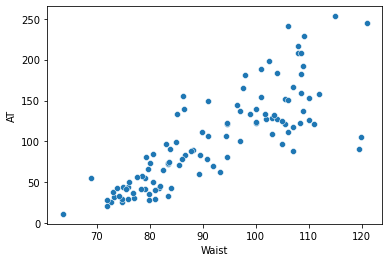

In [4]:
sns.scatterplot(x=data['Waist'],y=data['AT'])

In [5]:
# Correlation

data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<AxesSubplot:xlabel='Waist', ylabel='Density'>

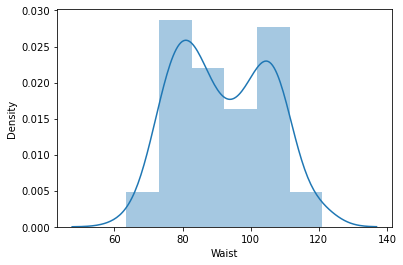

In [6]:
sns.distplot(data['Waist'])

<AxesSubplot:xlabel='AT', ylabel='Density'>

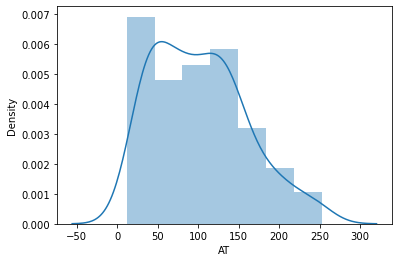

In [7]:
sns.distplot(data['AT'])

# Fitting a Linear Regression Model

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()

<AxesSubplot:xlabel='Waist', ylabel='AT'>

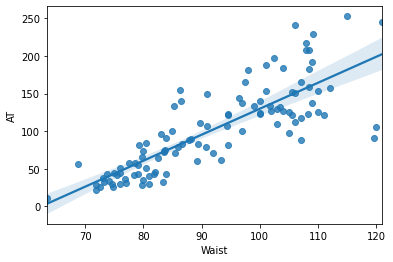

In [9]:
sns.regplot(x='Waist', y = "AT", data = data)

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.62e-27
Time:                        15:12:13   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [12]:
# t and p value
print(model.tvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64


In [13]:
model.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [14]:
print(model.predict)

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x000002044240A040>>


In [15]:
#R square value
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

# predict for new data

In [20]:
#Predict for 200 and 300 daily circulation
newdata=pd.read_csv('D:\\Jupyter\\classroom\\LinearRegression\\WC_AT.csv')
newdata

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [56]:
pr = newdata(columns =['Waist'])
pr

TypeError: 'DataFrame' object is not callable

In [45]:
data_pred = pd.DataFrame(pr,columns=['Waist'])
data_pred

,Waist
0,74.75
1,72.60
2,81.80
3,83.95
4,74.65
...,...
104,100.10
105,93.30
106,101.80
107,107.90


In [57]:
p=model.predict(data_pred)
p

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [58]:
newdata['p']=p

In [59]:
newdata

,Waist,AT,p
0,74.75,25.72,42.568252
1,72.60,25.89,35.131704
2,81.80,42.60,66.953210
3,83.95,42.80,74.389758
4,74.65,29.84,42.222366
...,...,...,...
104,100.10,124.00,130.250337
105,93.30,62.20,106.730093
106,101.80,133.00,136.130398
107,107.90,208.00,157.229440


In [ ]:
newdata.